## Imports and loading data

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
# from autoviz.AutoViz_Class import AutoViz_Class

In [2]:
data_path = 'D:\Kaggle\Datasets\heart_failure.csv'

In [3]:
heart_data = pd.read_csv(data_path)

## Understanding the basic features

In [4]:
heart_data.head

<bound method NDFrame.head of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_cr

In [5]:
heart_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
heart_data.shape

(299, 13)

In [7]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
heart_data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [9]:
X = heart_data.copy()
y = X.pop('DEATH_EVENT')

In [10]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


### Scaling the Data for better model performance

In [11]:
scaler = StandardScaler()
scaler.fit(heart_data.drop('DEATH_EVENT',axis = 1))
scaled_features = scaler.transform(heart_data.drop('DEATH_EVENT',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = heart_data.columns[:-1])
df_feat.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


## Exploratory Data Analysis

In [12]:
heart_data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [13]:
# AV = AutoViz_Class()
# df_av = AV.AutoViz(data_path)

In [14]:
# list of all binary categorical columns
cat_cols = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
# all numerical columns
num = []
for i in heart_data.columns:
    if i not in cat_cols:
        num.append(i)

In [15]:
cat_cols , num

(['anaemia',
  'diabetes',
  'high_blood_pressure',
  'sex',
  'smoking',
  'DEATH_EVENT'],
 ['age',
  'creatinine_phosphokinase',
  'ejection_fraction',
  'platelets',
  'serum_creatinine',
  'serum_sodium',
  'time'])

### Plotting categorical variables

In [23]:
# for i in cat_cols:
#     data=heart_data.copy()
#     data.groupby(i)['age'].median().plot.bar()
#     plt.xlabel(i)
#     plt.ylabel('age')
#     plt.title(i)
#     plt.show()

### Plotting numerical variables with categorical variables as hue 

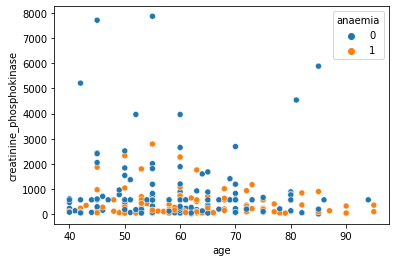

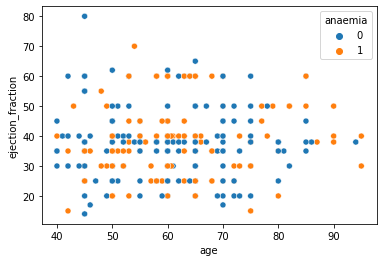

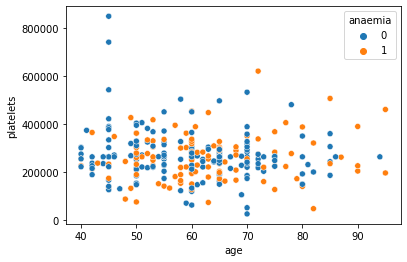

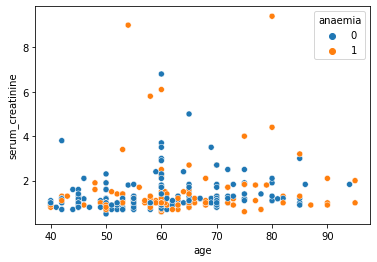

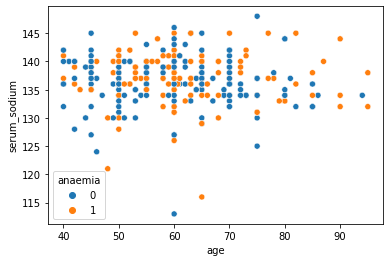

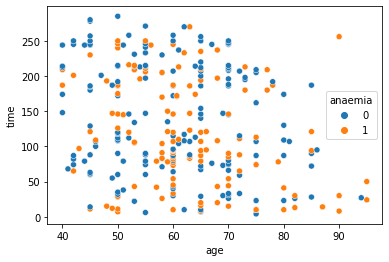

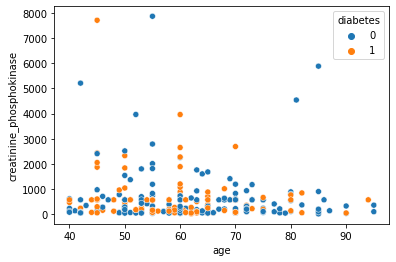

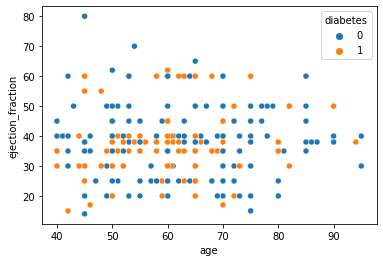

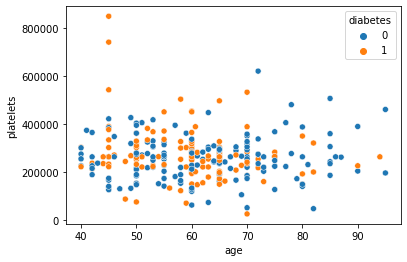

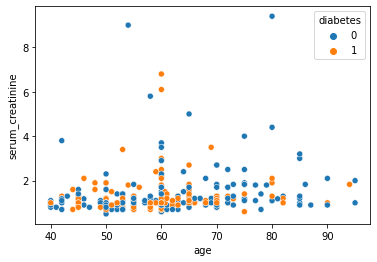

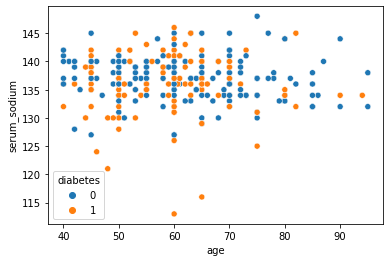

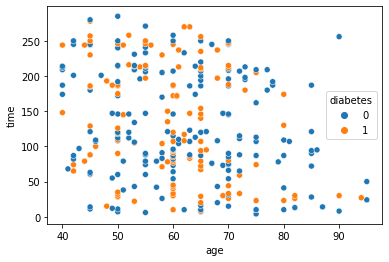

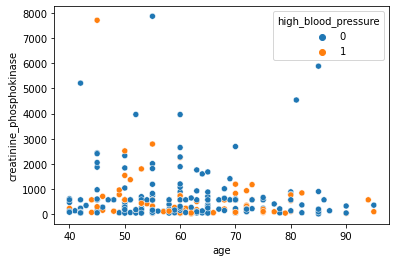

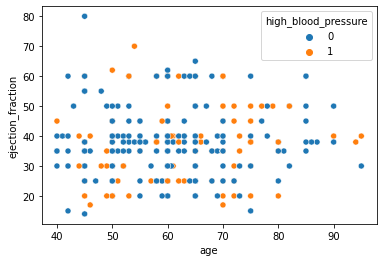

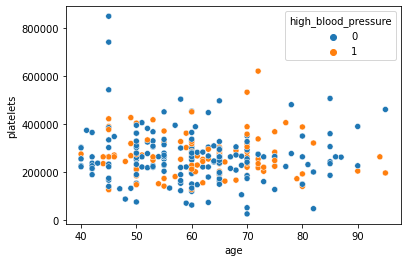

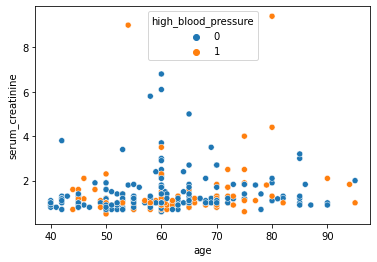

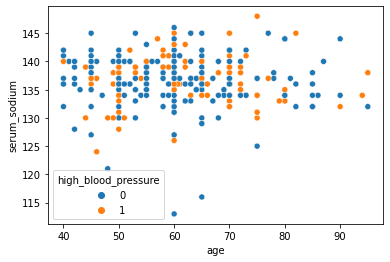

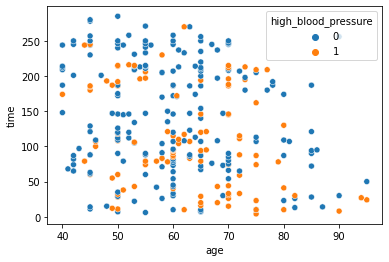

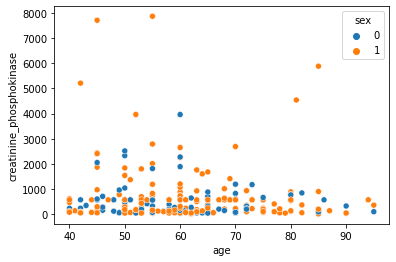

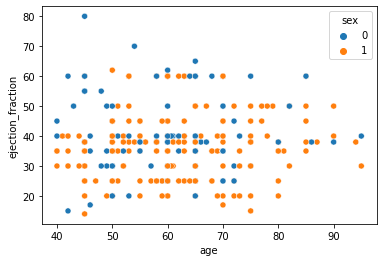

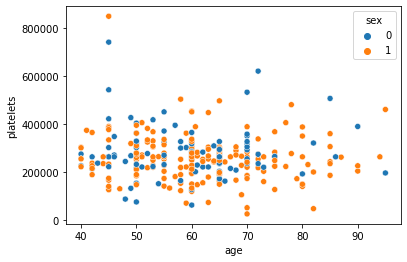

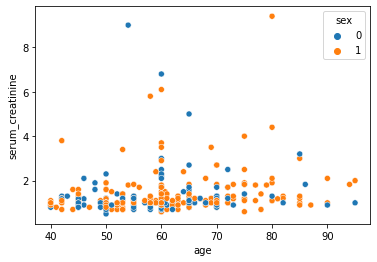

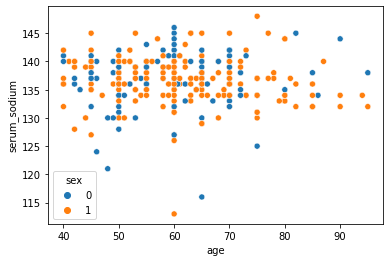

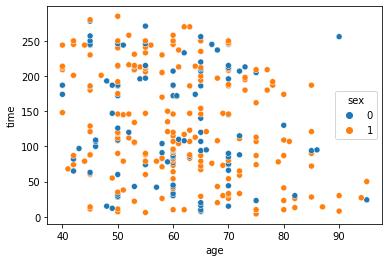

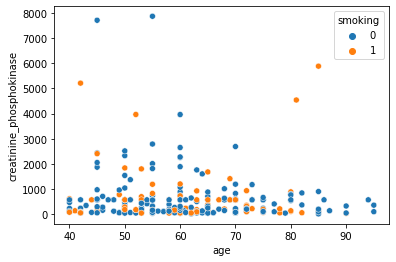

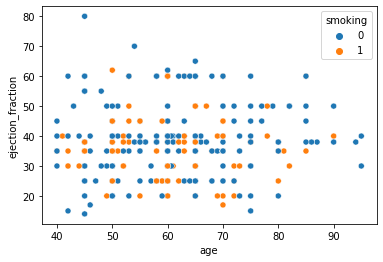

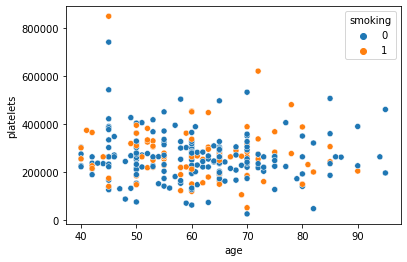

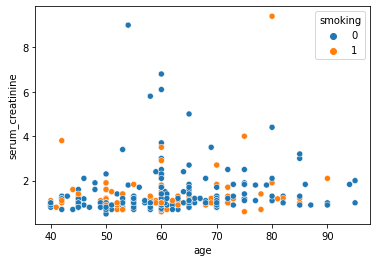

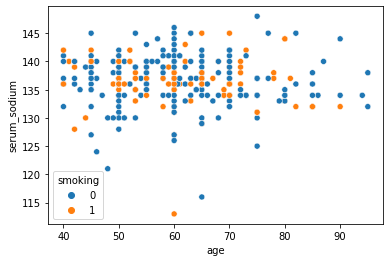

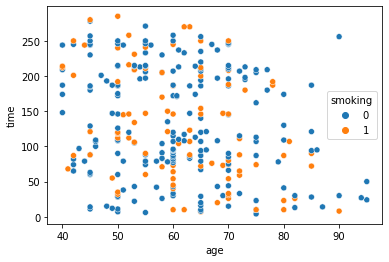

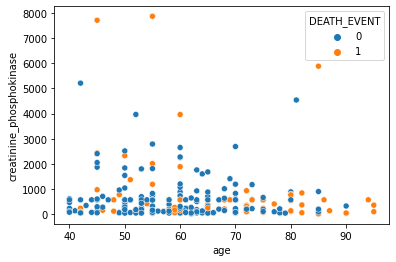

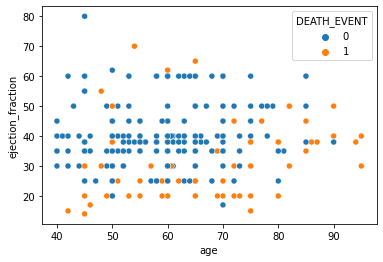

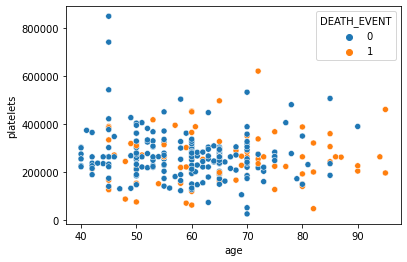

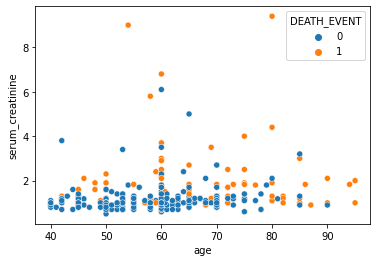

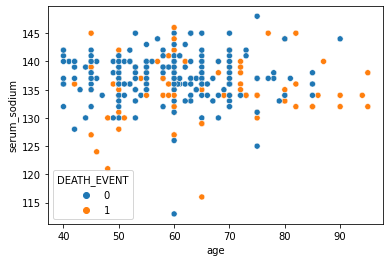

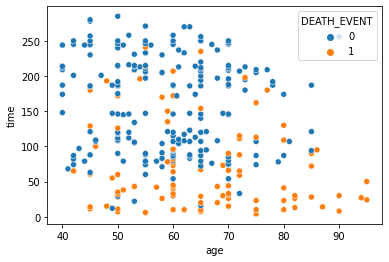

In [17]:
for i in range(len(cat_cols)):
    x='age'
    for j in range(len(num)):
        if num[j] != x:
            sns.scatterplot(x= x,y=num[j],hue=cat_cols[i],data=heart_data)
            plt.show()

### Plotting numerical variables

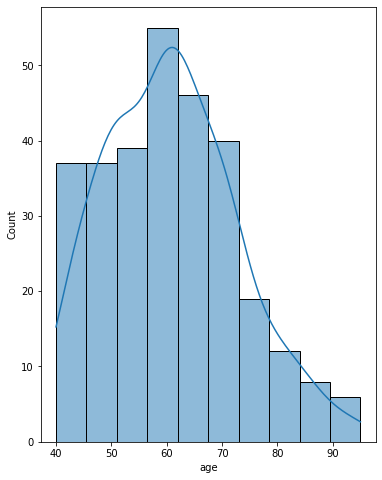

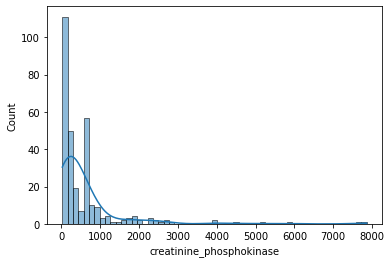

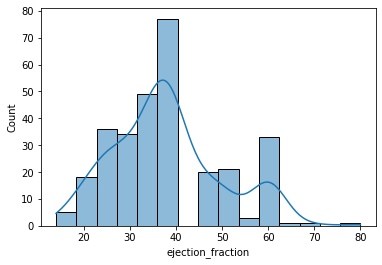

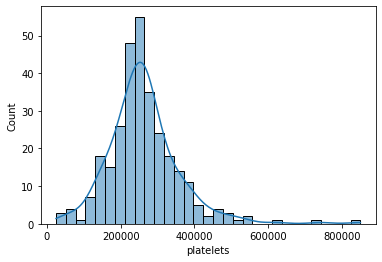

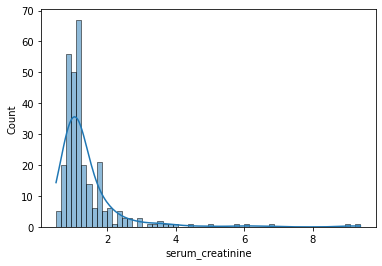

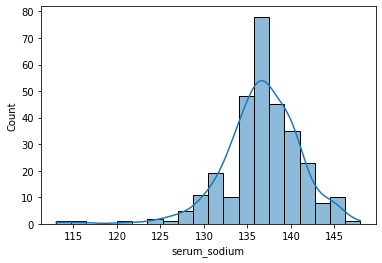

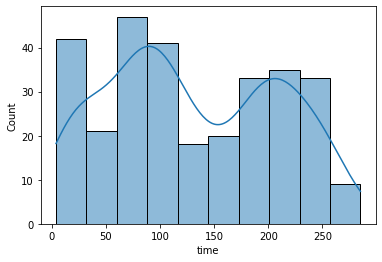

In [18]:
plt.figure(figsize=(6,8))
x = heart_data.drop(cat_cols, axis = 1)
for i in x.columns:
    sns.histplot(x[i],kde = True)
    plt.show()

In [19]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)

a = []
for i in X.columns:
    count_outliers(X,i)

No outliers in age
No outliers in anaemia
There are outliers in creatinine_phosphokinase
Count of outliers are: 29
No outliers in diabetes
There are outliers in ejection_fraction
Count of outliers are: 2
No outliers in high_blood_pressure
There are outliers in platelets
Count of outliers are: 20
There are outliers in serum_creatinine
Count of outliers are: 29
There are outliers in serum_sodium
Count of outliers are: 4
No outliers in sex
No outliers in smoking
No outliers in time


### Visualising these outliers

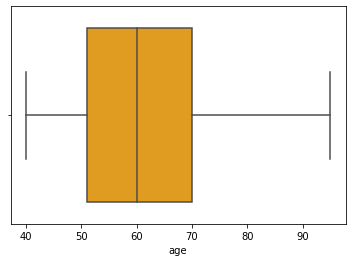

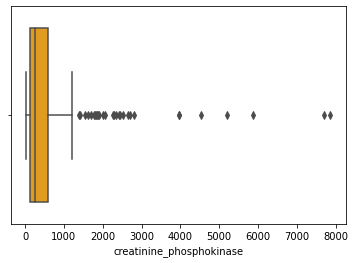

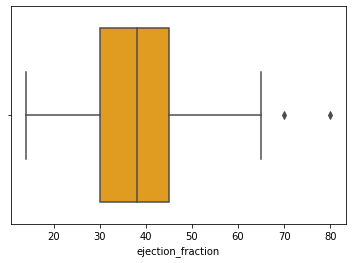

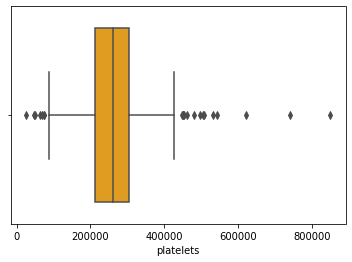

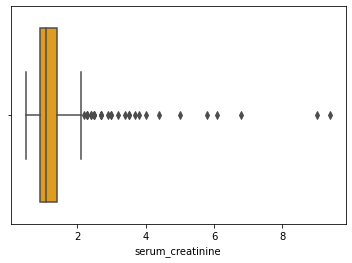

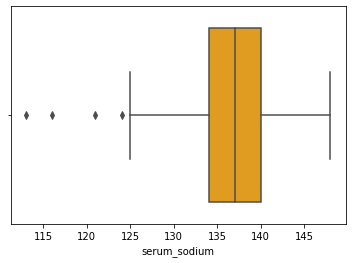

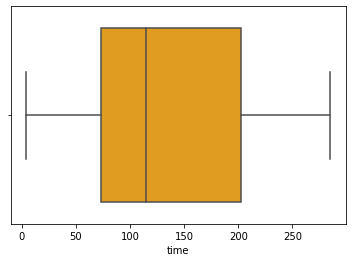

In [20]:
x = heart_data.drop(cat_cols,axis = 1)
for i in x.columns:
    sns.boxplot(x = i, data = x,color = 'orange')   
    plt.xlabel(i)
    plt.show()

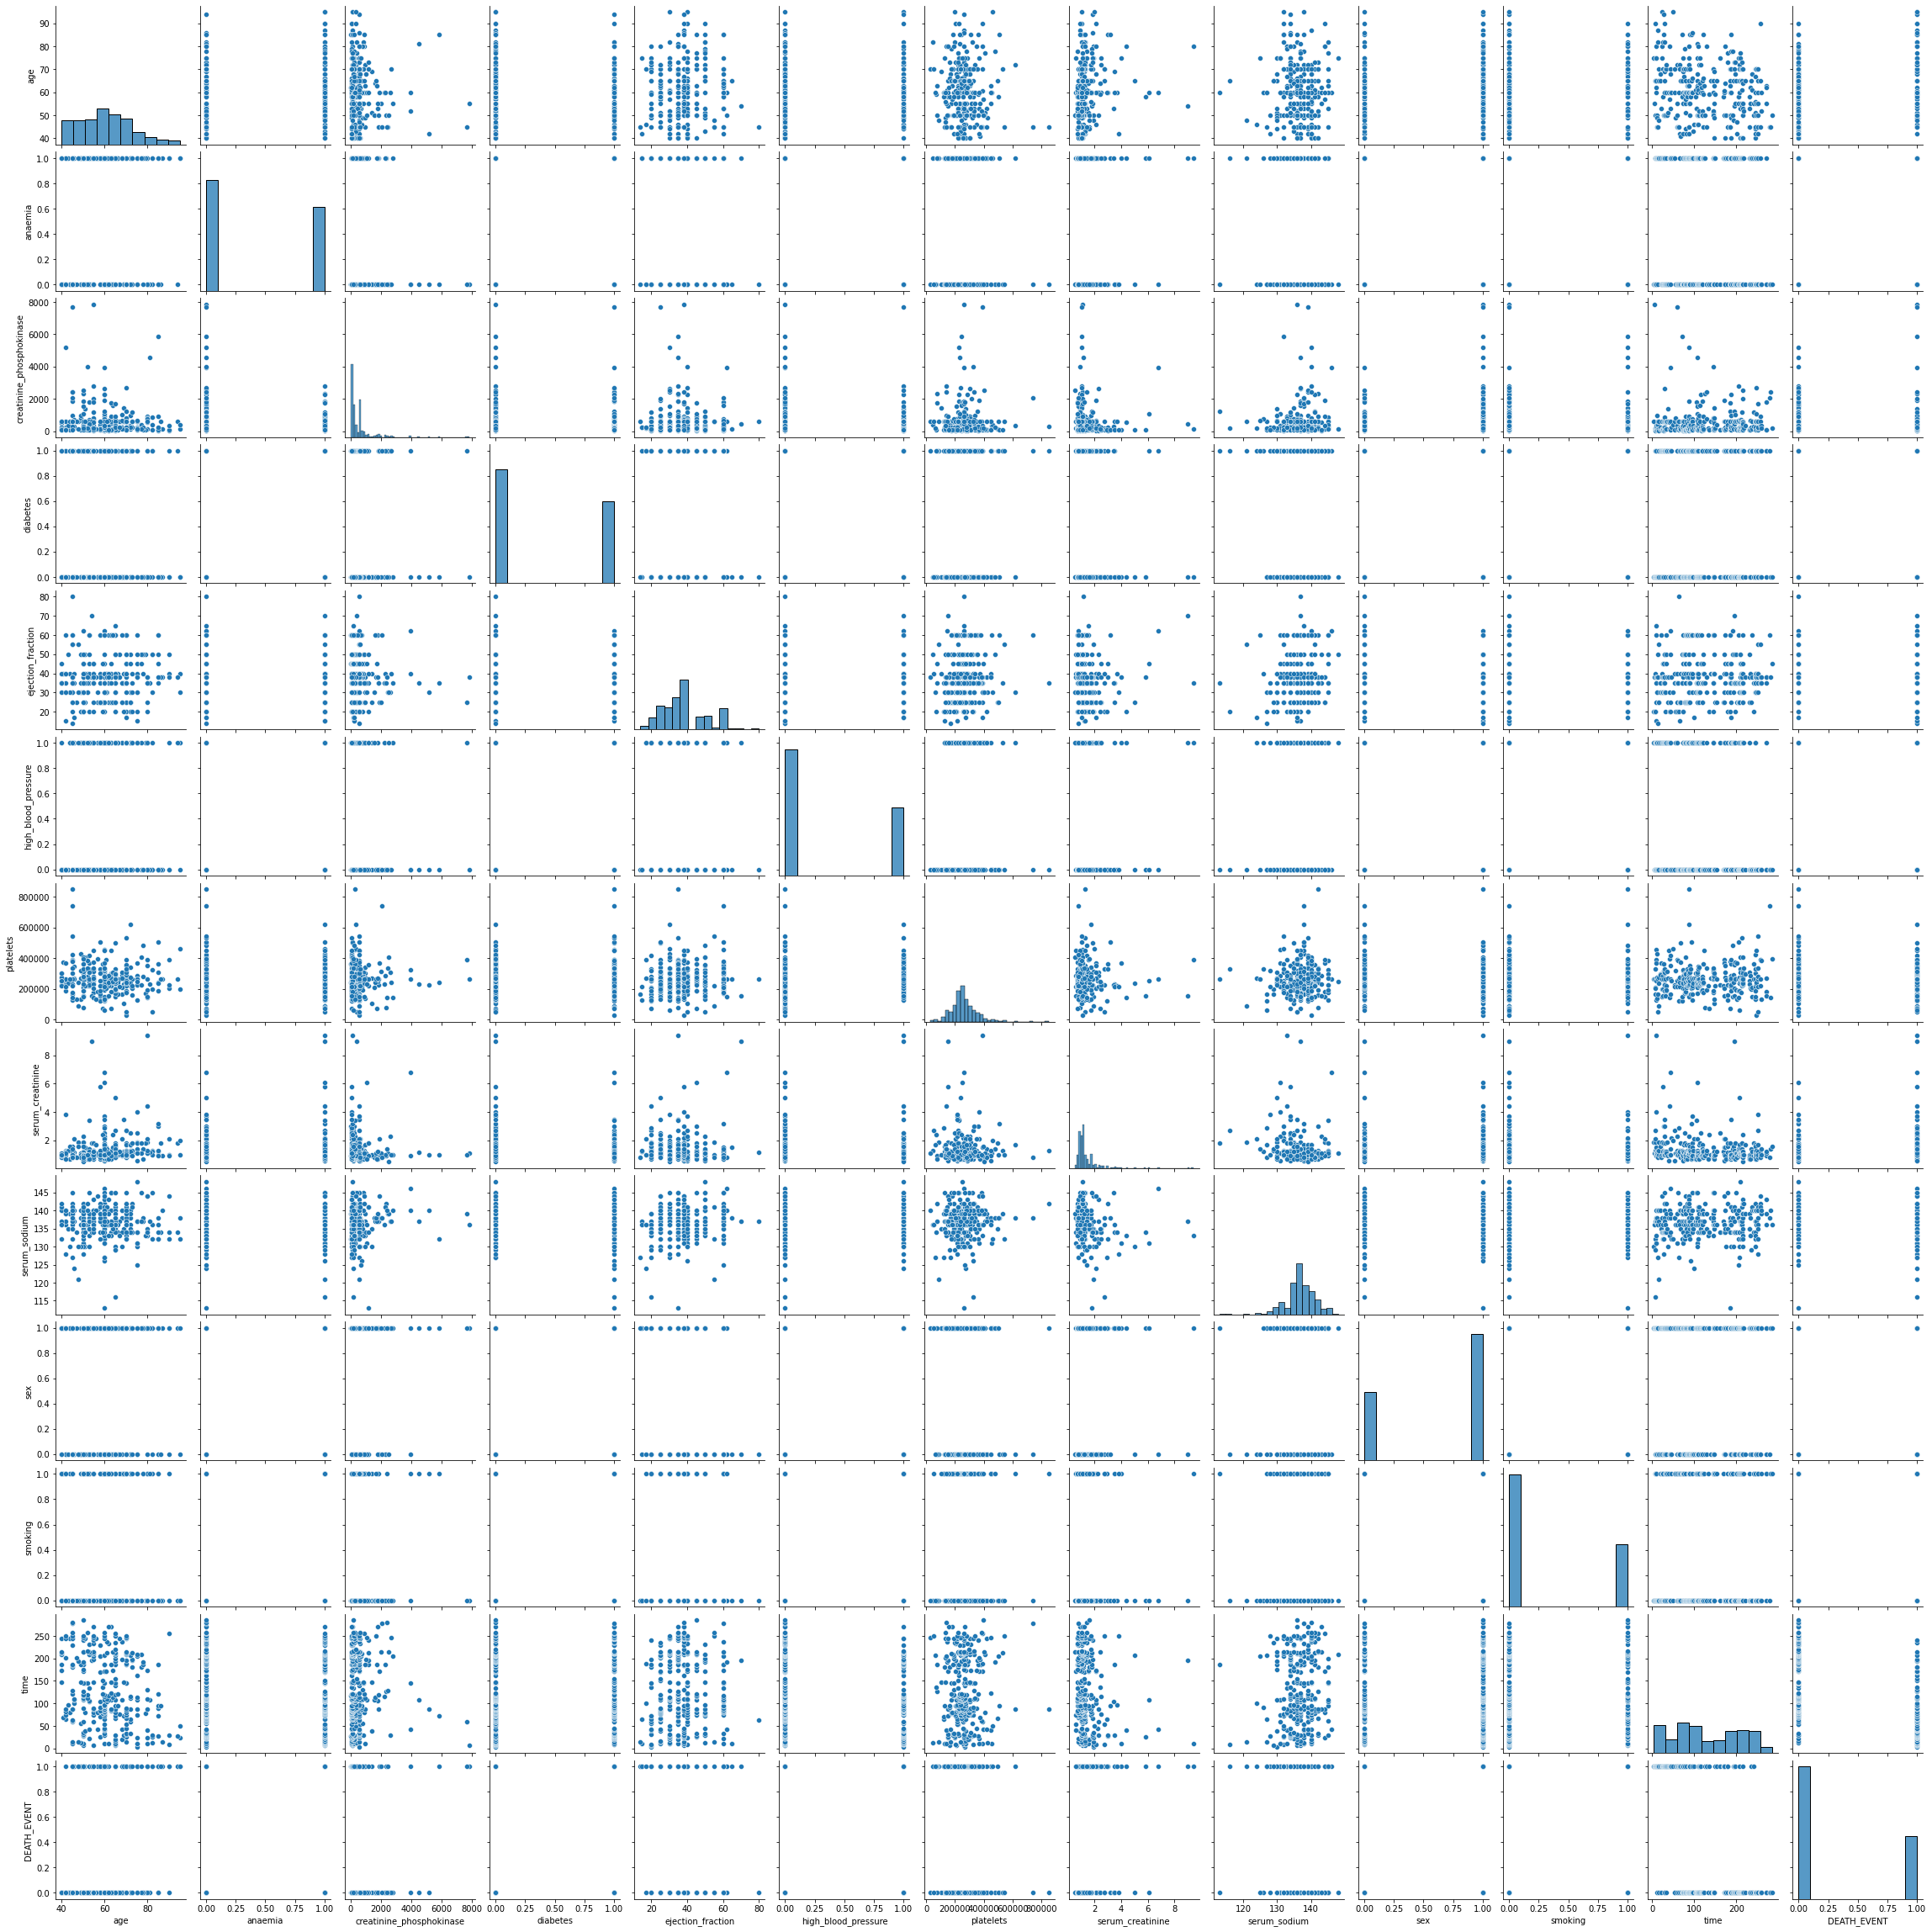

In [21]:
sns.pairplot(heart_data)

## Making Predictions

In [22]:
X = df_feat
y = heart_data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=7)

### Using KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors = 25)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
pred

D:\Python 3.9\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
print(confusion_matrix(y_test,pred))

[[75  1]
 [23  6]]


In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86        76
           1       0.86      0.21      0.33        29

    accuracy                           0.77       105
   macro avg       0.81      0.60      0.60       105
weighted avg       0.79      0.77      0.72       105



In [28]:
# %%capture --no-stderr
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

D:\Python 3.9\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Python 3.9\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Python 3.9\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Python 3.9\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Python 3.9\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
D:\Python 3.9\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifi

Text(0, 0.5, 'Error Rate')

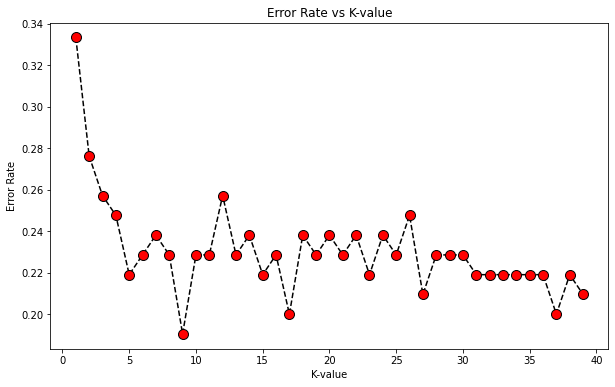

In [30]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K-value')
plt.xlabel('K-value')
plt.ylabel('Error Rate')

In [31]:
print(metrics.accuracy_score(y_test, pred))

0.7714285714285715


### Using Random Forests

In [32]:
forest= RandomForestClassifier(n_estimators = 40, random_state = 0)
forest.fit(X_train,y_train)  
y_pred = forest.predict(X_test)
forest.score(X_test,y_test)

0.8952380952380953

### Using Logistic Regression Analysis

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [37]:
pred = logmodel.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        76
           1       0.80      0.69      0.74        29

    accuracy                           0.87       105
   macro avg       0.84      0.81      0.83       105
weighted avg       0.86      0.87      0.86       105



In [36]:
print(confusion_matrix(y_test,pred))

[[71  5]
 [ 9 20]]


In [35]:
logmodel.score(X_test,y_test)

0.8666666666666667

-----------------------------------------